## Titanic Project

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

### load dataset

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Check Data Types

In [5]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [6]:
{col : df[col].nunique() for col in df if df[col].dtype == object}

{'sex': 2, 'embarked': 3, 'who': 3, 'embark_town': 3, 'alive': 2}

In [7]:
df = df.astype({
    'sex': 'category',
    'embarked' : 'category',
    'who' : 'category',
    'alive': 'category',
    'embark_town': 'category'
}
)

In [8]:
df.alive = df.alive.cat.codes

In [9]:
df.sex = df.sex.cat.codes

In [10]:
df[['alive','sex']]

,alive,sex
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,0,0
889,1,1


### Check Correlation

In [11]:
df.corr()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.094035,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.908578,-0.543351,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.280328,-0.077221,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.349943,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.182024,0.257307,-0.271832
adult_male,-0.557080,0.094035,0.908578,0.280328,-0.253586,-0.349943,-0.182024,1.000000,-0.557080,0.404744
alive,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
alone,-0.203367,0.135207,0.303646,0.198270,-0.584471,-0.583398,-0.271832,0.404744,-0.203367,1.000000


In [12]:
df.corr().style.background_gradient(cmap = 'Greens')

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.094035,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.908578,-0.543351,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.280328,-0.077221,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.349943,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.182024,0.257307,-0.271832
adult_male,-0.557080,0.094035,0.908578,0.280328,-0.253586,-0.349943,-0.182024,1.000000,-0.557080,0.404744
alive,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
alone,-0.203367,0.135207,0.303646,0.198270,-0.584471,-0.583398,-0.271832,0.404744,-0.203367,1.000000


In [13]:
df.drop(columns = ['alive'], inplace = True)

In [14]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,True


### Describe


In [15]:
df.describe()

,survived,pclass,sex,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df['embark_char'] = df.embark_town.str.get(0)

In [17]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone,embark_char
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False,S
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False,C
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True,S
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False,S
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,True,S
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,True,S
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,False,S
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,True,C


In [18]:
sum(df.embarked == df.embark_char)/df.shape[0]

0.9977553310886644

In [19]:
df.drop(columns = 'embark_town', inplace = True)

In [20]:
df.drop(columns = 'embark_char', inplace = True)

In [21]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,NaN,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,B,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,NaN,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,C,True


### Missing Values Check

In [22]:
df.describe()

,survived,pclass,sex,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
df.isna().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
deck          688
alone           0
dtype: int64

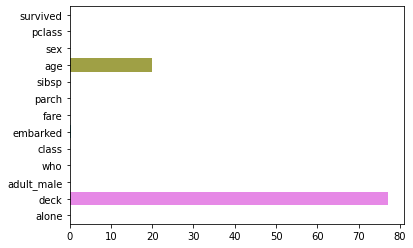

In [24]:
%matplotlib inline
ax = sns.barplot(
    x=df.isna().sum() / df.shape[0] * 100,
    y=df.columns
)

In [25]:
df.drop(columns = 'deck', inplace = True)

In [26]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,True
888,0,3,0,NaN,1,2,23.4500,S,Third,woman,False,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,True


In [27]:
df.corr()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.908578,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.908578,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.303646,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [28]:
df.groupby(['adult_male', 'sex']).age.mean()

adult_male  sex
False       0      27.915709
            1       5.466750
True        1      33.173123
Name: age, dtype: float64

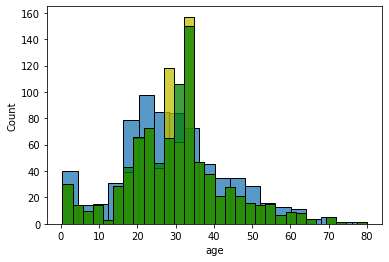

In [29]:
%matplotlib inline
df['age_1'] = df['age'].fillna(df.groupby(['adult_male', 'sex'])['age'].transform('mean'))
df['age_2'] = df['age'].fillna(df.groupby(['adult_male', 'sex', 'sibsp', 'alone'])['age'].transform('mean'))
ax = sns.histplot(df.age)
ax = sns.histplot(df.age_1, ax=ax, color='y', label='age_1')
ax = sns.histplot(df.age_2, ax=ax, color='g', label='age_2')

In [30]:
! pip install --upgrade seaborn



Requirement already up-to-date: seaborn in /home/abolfazl/anaconda3/lib/python3.7/site-packages (0.12.2)


In [ ]:
pip install -U seaborn